In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# open output file and read each line
rtt_file = open('rtt.txt', 'r')
lines = rtt_file.readlines()

# create list of used values
values = [50, 80, 100, 130, 150]
values.extend(list(range(200, 2050, 50)))

# define measures lists
avg = []
max = []
min = []
std = []

# parse data from each line
for l in lines:
    if(l[0:3] == 'rtt'):
        measures = l.split("=")[1]
        min.append(float(measures.split("/")[0].strip()))
        avg.append(float(measures.split("/")[1]))
        max.append(float(measures.split("/")[2]))
        std.append(float(measures.split("/")[3].split()[0]))

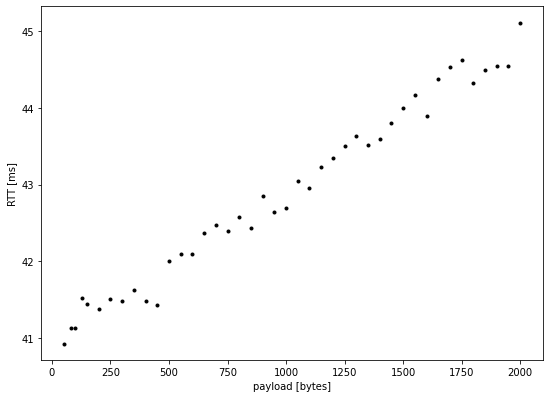

In [3]:
plt.scatter(values, min, color='black', marker=".")
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/min.png')
plt.show()

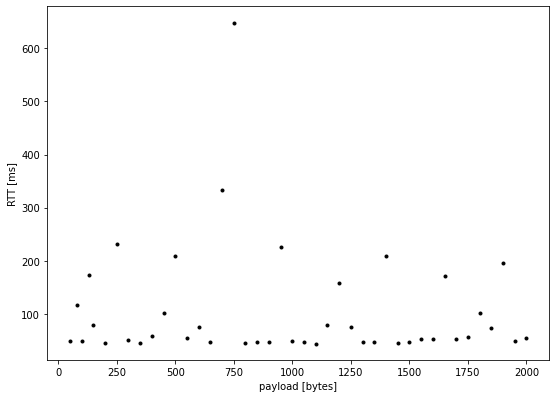

In [4]:
plt.scatter(values, max, color='black', marker=".")
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/max.png')
plt.show()

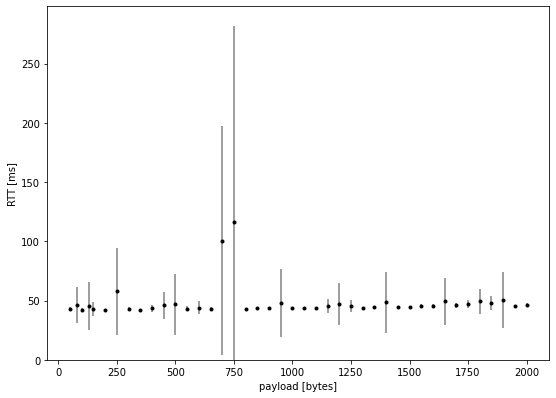

In [5]:
plt.errorbar(values, avg, yerr=std, fmt='.k', ecolor='grey')
plt.gca().set_ylim(bottom=0)
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/avg.png')
plt.show()

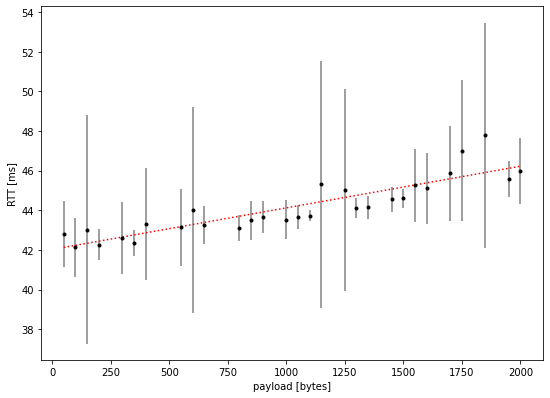

In [6]:
clean_avg = []
clean_std = []
clean_values = []
for i in range(len(avg)):
    if (std[i] < 10):
        clean_avg.append(avg[i])
        clean_std.append(std[i])
        clean_values.append(values[i])
# linear regression
plt.errorbar(clean_values, clean_avg, yerr=clean_std, fmt='.k', ecolor='grey')
m,q = np.polyfit(clean_values, clean_avg, 1)
plt.plot(clean_values, m*np.array(clean_values) + q, linestyle=':', color="red")
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/clean_avg.png')
plt.show()

Compute the RTT of each experiment